This is a notebook of how I'll be implementing the (composite) 1/3-Simpson's rule

Given an integrable function $f: [a,b] \to \mathbb{R}$ and specifying the number $m$ of equally spaced subintervals in $[a,b]$, meaning that
$$
    a=x_0 < x_1 < x_2 < \cdots < x_{2m - 1} < x_{2m} = b
$$
where $[x_i,x_{i + 1}]$ are intervals such that $|x_{i + 1} - x_i| = |x_{i + 2} - x_{i + 1}|$ for all $0 \leq i \leq 2m - 2$, then the composite 1/3-Simpson's rule is a $4$-th order approximation scheme to the integral given by the formula:
$$
    \int_{a}^{b} f(x)dx \approx \frac{h}{3} \left(f(a) + 4\sum_{i = 1}^{m} f(x_{2i - 1}) + 2\sum_{i = 1}^{m-1} f(x_{2i}) + f(b) \right)
$$

Denoting $Q$ as the value computed by the rule then the error can be completely bounded by:
$$
    \int_{a}^{b} f(x)dx = Q - \frac{(b - a)h^4}{180} f^{''''}(\xi)
$$
for some value $\xi \in (a,b)$. 

With that said, below is the code for the computation.

In [14]:
import numpy as np

# Information about the function and integral scheme (change values to suit your cases)
def f(x):
    return np.exp(np.sin(x))

lower = -10      # Lower bound of integration
upper = 10       # Upper-bound of integration
intervals = 128  # Number of intervals considered in the Simpson's rule

In [15]:
# Simpson's rule calculation
def simpson(f,start, end, subintervals):
    # Step size
    h = (end - start)/(2*subintervals)

    # Initialize result
    result = f(start) + f(end)
    
    # Making initial jump in the input (since we have already evaluated f at the starting point)
    x = start + h   
    # Iterating through the formula
    for k in range(1, 2*subintervals):
        if k % 2 == 0:
            result += 2*f(x)
        else:
            result += 4*f(x)
        x += h
    # Finialize the 1/3-Simpson rule formula
    result = (h/3)*result

    return result


In [16]:
# Result of integration
simpson(f, lower, upper, intervals)

25.07550044631849

<b> Richardson Extrapolation </b>

Recall that we can extend the accuracy of a Quadrature by applying the Richardson's extrapolation. To apply this to the Simpson's Rule, let $S(h)$ be the Simpson's Rule at step-size $h$ that is, choose appropriate the number of subintervals $m$ where $h = \frac{b - a}{m}$, then since $S(h)$ is a $4$-th order quadrature, 
$$
    S(h) = \int_a^b f(x)dx + \alpha h^4 + O(h^5)
$$
then with step doubling
$$
    S(2h) = \int_a^b f(x)dx + \alpha (2h)^4 + O(h^5) = \int_a^b f(x)dx + 16\alpha h^4 + O(h^5)
$$
we can see that 
$$
    16S(h) - S(2h) = 15\int_a^b f(x)dx + O(h^5) \implies \int_a^b f(x)dx = \frac{16S(h) - S(2h)}{15} + O(h^5)
$$

One nice thing about this extrapolation is that it is actually a $6$-th order method.

In [17]:
def extrap_simpson(f, lower, upper, intervals):
    return (16*simpson(f, lower, upper, intervals) - simpson(f, lower, upper, 2*intervals))/15

extrap_simpson(f, lower, upper, intervals)

25.075500401776946

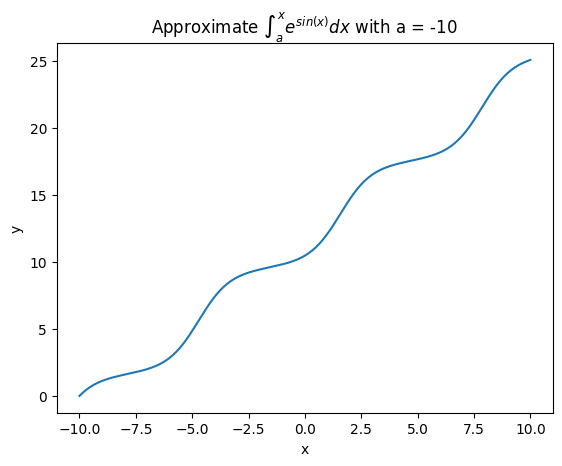

In [18]:
import matplotlib.pyplot as plt

x = np.arange(start=lower, stop=upper, step=(upper - lower)/(2*intervals))
x = np.append(x,upper)

y = np.array([])
for pt in x:
    y = np.append(y, extrap_simpson(f,lower,pt,intervals))

plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title(r"Approximate $\int_a^x e^{sin(x)}dx$ with a = " + str(lower)) # Obviously, change this if you are working with different functions
plt.show()
